<a href="https://colab.research.google.com/github/johnatanDM/PolioBrasil/blob/main/Notebooks/Projeto_PolioBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [17]:
!pip freeze > requirements.txt

In [2]:
# def coluna_ano_para_timestamp(ano):
#   return date(ano,1,1)

def baixa_dados(url, skiprows, skipfooter):
  dados = pd.read_csv(url, 
                    delimiter=';', 
                    encoding = "ISO-8859-1",
                    skiprows=skiprows,
                    skipfooter=skipfooter,
                    thousands=".",
                    engine='python')

  #Criando uma coluna Região
  regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
  estados = dados['Unidade da Federação']
  dados["Regiao"] = list(map(lambda estado: regioes[estado[0]] , estados))

  #Criando a coluna uf e transformando em index
  dados['uf'] = dados['Unidade da Federação'].str[3:]
  dados.drop(columns=['Unidade da Federação'], inplace=True)
  dados.set_index('uf', inplace=True)

  #retirando anos com dados incompletos
  dados.replace('-',np.nan, inplace=True)
  dados.dropna(axis=1, inplace=True)

  return dados

baixando dados

In [3]:
'''Imunizações - Cobertura - Brasil
Doses Cáculos CV por Unidade da Federação e Ano
Imuno: 074 Poliomielite, 100 Poliomielite 4 anos
Período:1994-2019
'''
url = 'https://github.com/johnatanDM/PolioBrasil/raw/main/Dados/A175905189_28_143_208.csv'
dados_imunizacoes = baixa_dados(url, 4, 20)
dados_imunizacoes.sample(10)

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,Regiao
uf,,,,,,,,,,,,,,,,,,,,,,,,,
Rio de Janeiro,222365,233775,235078,243444,227932,259159,258845,248893,265565,227051,243055,233739,236915,231439,242886,209790,220297,224814,239545,210018,207922,190737,72492,5579724,Sudeste
Amapá,10015,9218,10855,12979,22652,13382,14533,14525,14090,13882,14255,14666,18028,12974,12092,13248,14101,12007,14489,7721,10376,10650,7219,312031,Norte
Paraná,178827,178566,174272,187300,176895,169527,162644,159099,159890,158957,151523,145522,149707,148567,152898,144370,160010,152038,151676,139974,143582,136074,91213,3884633,Sul
Pernambuco,194554,201163,196252,186398,171659,161937,172625,164302,166528,160132,158743,154858,154009,143483,155417,141918,142876,143739,154539,129654,121397,123082,73680,4069305,Nordeste
Rondônia,27372,31703,29458,30687,32260,30817,30004,30011,30979,30436,27794,28390,29203,26389,27986,27559,27664,28654,28514,29049,29925,27048,15704,735116,Norte
Minas Gerais,243283,265305,303920,352352,316183,293564,284340,287340,292643,282084,273978,260047,265414,253366,260449,248823,268316,250745,251113,235424,230724,241624,150782,6111819,Sudeste
Sergipe,37269,37673,41251,41485,40441,38291,39757,38439,36318,36879,38908,36606,37100,35044,36283,33984,34720,32147,32066,26905,27182,28709,18118,876697,Nordeste
Goiás,64129,87744,96888,101467,93959,93205,95869,97861,95199,96750,95673,91187,91999,87946,93671,88325,96587,91043,90823,81874,83591,81054,51895,2251459,Centro-Oeste
Acre,10176,9521,10469,14104,16969,19380,21043,18263,16242,15567,18825,17025,18696,17536,18717,16194,16509,12585,14078,12167,12625,12207,8157,365245,Norte


In [4]:
'''Nascidos vivos - Brasil
Nascim p/resid.mãe por Unidade da Federação e Ano do nascimento
Período:1994-2019
'''
url = 'https://github.com/johnatanDM/PolioBrasil/raw/main/Dados/A003819189_28_143_208.csv'
dados_nacidos_vivos = baixa_dados(url,3,13)
dados_nacidos_vivos.drop(columns=['1994', '1995', '1996'], inplace=True)
dados_nacidos_vivos.sample(10)

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,Regiao
uf,,,,,,,,,,,,,,,,,,,,,,,,,
Bahia,229256,234630,242721,239530,235725,237375,239017,234454,231065,220187,220398,221700,217727,212201,215032,209999,203342,204034,206655,199830,204096,205332,197249,5564645,Nordeste
Sergipe,42416,41525,41118,40716,39842,37085,36884,35827,37370,37061,35801,36633,35109,34016,34925,34108,34228,34369,34917,32218,33867,34256,32697,956215,Nordeste
Mato Grosso,50335,49042,48933,49478,47575,47564,48539,51205,52410,49522,47382,49794,48477,48929,51218,51256,53039,56499,56673,53531,57271,58649,58852,1320542,Centro-Oeste
Pará,109095,116551,127417,126340,134742,136000,144812,142894,145540,150202,150147,151262,143140,140687,141974,137837,139416,143503,143657,137681,138684,141819,138341,3469286,Norte
Amazonas,56070,57180,62037,67646,70252,70671,70751,71345,73488,75584,73469,75030,75729,74188,76202,77434,79041,81145,80097,76703,78066,78087,77622,1822695,Norte
Espírito Santo,60188,58526,60800,58380,57092,55076,53417,53243,52399,51449,51020,51852,51457,51853,53053,52835,54065,56548,56941,53413,55846,56721,54925,1430725,Sudeste
Amapá,14319,14450,13592,14238,14609,14196,14764,13971,14205,14714,14425,15105,14298,15008,15114,14895,15710,16271,15750,15521,15399,15864,15356,378789,Norte
Rio Grande do Sul,180760,177538,184797,176719,160590,155261,149165,153015,147199,141331,133401,135143,133652,133243,137710,138941,141350,143315,148359,141411,141568,140047,134596,3988268,Sul
Mato Grosso do Sul,43420,41917,41859,40490,40070,39933,39248,41567,41424,39515,38621,41229,40274,40132,42152,42252,42296,44058,44142,42432,44747,44275,43695,1093870,Centro-Oeste


In [5]:
anos = list(dados_imunizacoes.columns[:-2])
dados_imunizacoes_m = dados_imunizacoes.reset_index().melt(id_vars=['uf'], value_vars=anos)
dados_imunizacoes_m.columns = ['uf', 'ano', 'doses']
dados_imunizacoes_m.doses = dados_imunizacoes_m.doses / 1000

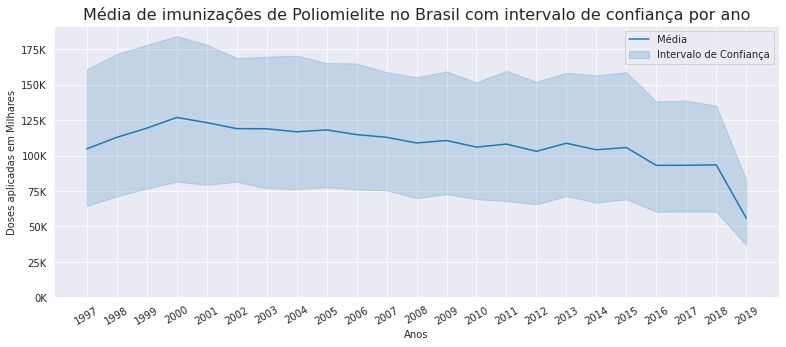

In [6]:
plt.figure(figsize=(13,5))
sns.set_style('darkgrid')
ax = sns.lineplot(data=dados_imunizacoes_m, x='ano', y='doses')
plt.ylim(0,)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}K"))
plt.title('Média de imunizações de Poliomielite no Brasil com intervalo de confiança por ano', fontsize=16)
ax.set_ylabel('Doses aplicadas em Milhares')
ax.set_xlabel('Anos')
plt.xticks(rotation=30)
plt.legend(['Média', 'Intervalo de Confiança'])
plt.show()

Pelo gráfico é possível ver que o número médio de aplicações da vacina contra a Poliomielite no Brasil está em uma sutil tendência de baixa. Sendo acentuada nos últimos 10 anos.

Vamos analisar os estados do Nordeste.

In [7]:
imunizacoes_nordeste = dados_imunizacoes.query("Regiao == 'Nordeste'")
anos = list(imunizacoes_nordeste.columns[:-2])
imunizacoes_nordeste_m = imunizacoes_nordeste.reset_index().melt(id_vars=['uf'], value_vars=anos)
imunizacoes_nordeste_m.columns = ['uf', 'ano', 'doses']
imunizacoes_nordeste_m.doses = imunizacoes_nordeste_m.doses / 1000

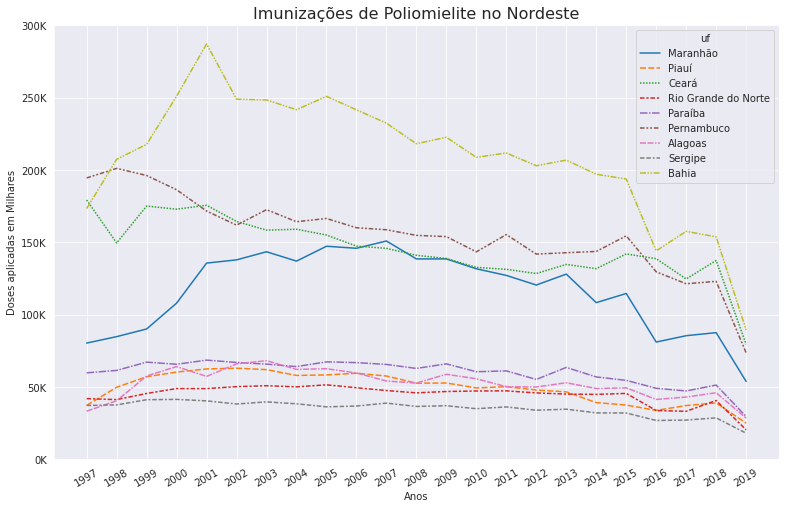

In [8]:
plt.figure(figsize=(13,8))
sns.set_style('darkgrid')
ax = sns.lineplot(data=imunizacoes_nordeste_m, x='ano', y='doses', hue='uf', style='uf')
plt.ylim(0,)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}K"))
plt.title('Imunizações de Poliomielite no Nordeste', fontsize=16)
ax.set_ylabel('Doses aplicadas em Milhares')
ax.set_xlabel('Anos')
plt.xticks(rotation=30)
plt.show()

A tendência de baixa é bem visível em no estados da Bahia, Pernambuco, Ceará e Maranhão.

Já nos outros estados não se observa essa tendência ou é bem menor.

Vamos olhar mais de perto o do estado do Ceará e comparar com o número de Nascidos vivos registrados no estado.

In [9]:
# Dados de imunizações no Ceará
imunizacoes_ceara = dados_imunizacoes.loc['Ceará'].reset_index()
imunizacoes_ceara = imunizacoes_ceara[:-2]
imunizacoes_ceara.columns = ['ano', 'imunizacoes']
imunizacoes_ceara.ano.astype('category')
imunizacoes_ceara.imunizacoes = imunizacoes_ceara.imunizacoes.astype('int64') / 1000

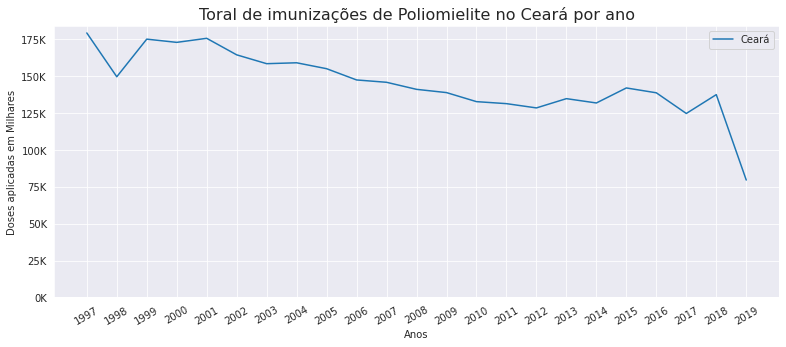

In [10]:
plt.figure(figsize=(13,5))
sns.set_style('darkgrid')
ax = sns.lineplot(data=imunizacoes_ceara, x = 'ano', y= 'imunizacoes')
plt.ylim(0,)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}K"))
plt.title('Toral de imunizações de Poliomielite no Ceará por ano', fontsize=16)
ax.set_ylabel('Doses aplicadas em Milhares')
ax.set_xlabel('Anos')
plt.xticks(rotation=30)
plt.legend(['Ceará'])
plt.show()

In [11]:
# Dados de nacidos vivos do Ceará
dados_nacidos_ceara = dados_nacidos_vivos.loc['Ceará'].reset_index()
dados_nacidos_ceara = dados_nacidos_ceara[:-2]
dados_nacidos_ceara.columns = ['ano', 'nacidos']
dados_nacidos_ceara.ano.astype('category')
dados_nacidos_ceara.nacidos = dados_nacidos_ceara.nacidos.astype('int64') / 1000

A vacina contra a Poliomielite deve ser tomada em 5 doses. Sendo as 3 primeiras logo no primeiro ano da criança e as outras duas (reforço) até os 4 ou 5 anos de idade.

Portanto para comparação com o número de nacidos vamos divir o número de doses aplicadas por 5 para chegar a uma aproximação de crianças imunizadas nos 5 primeiros anos de vida.

In [12]:
imunizacoes_ceara['imunizacoes'] = imunizacoes_ceara['imunizacoes'] / 3

In [13]:
dados_nacidos_ceara.set_index('ano', inplace=True)
imunizacoes_ceara.set_index('ano', inplace=True)

In [14]:
nacidos_imunizacoes_ceara = imunizacoes_ceara.join(dados_nacidos_ceara)
nacidos_imunizacoes_ceara_m = nacidos_imunizacoes_ceara.reset_index().melt(id_vars='ano',value_vars=nacidos_imunizacoes_ceara.columns)
nacidos_imunizacoes_ceara_m.columns = ['ano', 'chave', 'valor']
nacidos_imunizacoes_ceara_m.sample(10)

,ano,chave,valor
17,2014,imunizacoes,43.946
32,2006,nacidos,135.020
44,2018,nacidos,131.491
33,2007,nacidos,133.839
1,1998,imunizacoes,49.875
27,2001,nacidos,149.067
24,1998,nacidos,139.743
18,2015,imunizacoes,47.341
38,2012,nacidos,126.868
30,2004,nacidos,137.335


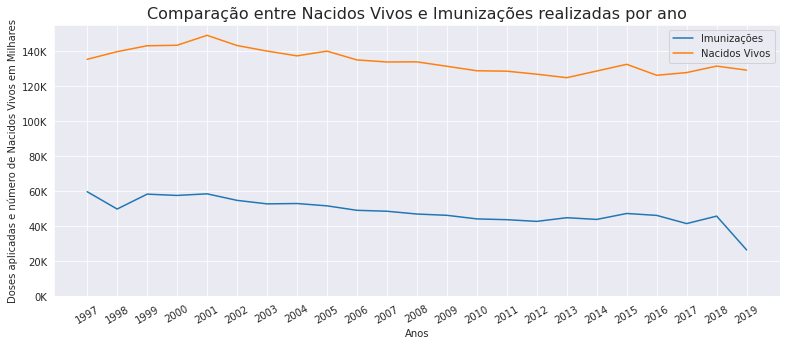

In [16]:
plt.figure(figsize=(13,5))
sns.set_style('darkgrid')
ax = sns.lineplot(data=nacidos_imunizacoes_ceara_m, x = 'ano', y= 'valor', hue='chave')
plt.ylim(0,)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}K"))
plt.title('Comparação entre Nacidos Vivos e Imunizações realizadas por ano', fontsize=16)
ax.set_ylabel('Doses aplicadas e número de Nacidos Vivos em Milhares')
ax.set_xlabel('Anos')
plt.xticks(rotation=30)
plt.legend(['Imunizações','Nacidos Vivos'])
plt.show()

Com esse gráfico suspeitamos que as doses aplicadas não estão sendo o suficiente para imunizar todas as crianças.

Mas vários fatores podem estar ocasionando essa diferença. Algumas hipóteses são:
* Os pais estão negligenciando a continuidade da imunização que conta com 5 doses tomadas em períodos específicos dos primeiros anos da criança. Principalmente os reforços que devem ser tomados, um com 15 a 18 meses de vida e outro com 4 a 5 anos.
* Existe também uma quantidade de crianças quem acabam falecendo por vários motivos diversos antes de completar o ciclo de imunização.
* Não podemos esquecer ainda que se trata de dados do governo e a subnotificação é recorrente. 